In [1]:
import os
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt

def iterate_sep():
    cwd = os.getcwd()
    sep = '/Podatki SEP2'
#     dictt = {}
    dict_mismart = read_mismart(cwd+'/Mismart')
    mismart = pd.DataFrame(dict_mismart)
    for folder in os.listdir(cwd+sep):
        dictt = read_sep(cwd + sep + '/' + folder)
        sep = pd.DataFrame(dictt)
        df_diff = calculate_loss(sep, mismart[folder[0:5]])
        df_diff.plot()
        

def read_sep(directory):
    dict_df = {}
    for filename in os.listdir(directory):
        if '86400' in filename:
            tmp_df = pd.read_csv(os.path.join(directory+'/'+filename), sep=";", delimiter=";", index_col=[0], parse_dates=True)
            tmp_df_poz = tmp_df.loc[tmp_df.VrstaMeritve == "A+_T0_86400_cum_kWh"].Vrednost
            tmp_df_poz = tmp_df_poz.apply(lambda x: float(x.replace(',','.')))
            tmp_df_poz = tmp_df_poz - tmp_df_poz.shift(periods=1, fill_value=0)
            try:
                tmp_df_poz[0] = 0
            except:
                pass
            dict_df[filename[6:12]] = tmp_df_poz
    return dict_df
        
def get_sum_sep(dictt):
    dff = pd.DataFrame(dictt)
    dff['suma'] = dff.sum(axis = 1)*1440
    return dff

def read_mismart(directory):
    df_dict = {}
    for filename in os.listdir(directory):
        if '.csv' in filename:
            df_TP = pd.read_csv(directory + '/' + filename, sep="\t", index_col=["Timestamp"], parse_dates=True).resample("D").mean()
            if 'P_W' in df_TP.columns:
                df_dict[filename[:-4]] = df_TP.P_W
            else:
                pass
    return df_dict
            
def calculate_loss(df1, df2):
    razlika = []
    finaldf = pd.DataFrame()
    prvadf = pd.DataFrame()
    vtoradf = pd.DataFrame()
    prvadf['Value'] = df1['suma'].loc['2019-10-01 22:00:00+00:00':'2021-03-31 22:00:00+00:00']
    vtoradf['Value'] = df2['P_W'].loc[:'2021-03-31 22:00:00+00:00']
    for i, j in zip(prvadf['Value'], vtoradf['Value']):
        razlika.append(j-i)
    finaldf['timestamp'] = prvadf.index
    finaldf['difference'] = razlika

In [2]:
cwd = os.getcwd()
sep = '/Podatki SEP2'
#     dictt = {}
dict_mismart = read_mismart(cwd+'/Mismart')
mismart = pd.DataFrame(dict_mismart)

In [3]:
mismart.head()

,T0289,T1190,T0139,T0176,T0613,T0149,T0997,T0565,T0558,T0404,...,T0394,T0233,T0150,T0609,T1000,6000602,T0647,T1015,T0645,T0644
Timestamp,,,,,,,,,,,,,,,,,,,,,
2019-10-01 00:00:00+00:00,25504.062500,NaN,348.645833,36227.395833,NaN,13215.659722,5257.152778,4792.222222,48859.236111,14181.701389,...,6814.791667,NaN,30369.965278,6873.611111,2808.604167,1515.034722,12725.513889,8309.638889,6305.902778,2012.986111
2019-10-02 00:00:00+00:00,26848.368056,NaN,781.631944,35633.645833,NaN,12697.847222,4886.388889,5574.131944,68498.611111,16407.708333,...,5220.451389,NaN,32596.701389,7745.798611,3390.552083,1376.666667,13487.267361,8499.375000,5716.631944,2543.993056
2019-10-03 00:00:00+00:00,25633.923611,NaN,453.437500,36115.347222,NaN,10662.777778,5051.979167,4962.187500,64645.625000,13418.426573,...,4322.395833,NaN,30542.395833,7364.270833,3019.201389,1159.652778,11274.069444,8332.892361,5867.395833,2305.173611
2019-10-04 00:00:00+00:00,25545.138889,NaN,811.423611,39638.402778,NaN,9635.069444,4930.347222,5529.548611,40638.472222,17770.034722,...,4681.666667,NaN,28472.222222,6852.048611,2866.614583,1483.715278,10345.274306,7791.052083,5772.013889,2522.465278
2019-10-05 00:00:00+00:00,28758.263889,NaN,676.562500,45146.180556,NaN,13604.965278,5741.458333,5490.902778,12018.541667,15384.513889,...,3928.819444,NaN,33160.937500,8089.340278,3662.159722,1783.298611,12289.423611,8844.909722,6111.041667,4023.159722


In [4]:
mismart.isna().sum()

T0289        0
T1190      386
T0139        0
T0176        0
T0613      490
T0149      237
T0997        0
T0565        0
T0558        0
T0404        0
T0389        0
T0403        0
T1127        0
T0576        0
T0614        0
T0432       10
T0394        0
T0233      514
T0150        0
T0609        0
T1000        0
6000602      0
T0647        0
T1015        0
T0645        0
T0644        0
dtype: int64

In [5]:
mismart = mismart.dropna(axis=1)

In [6]:
mismart.head()

,T0289,T0139,T0176,T0997,T0565,T0558,T0404,T0389,T0403,T1127,...,T0614,T0394,T0150,T0609,T1000,6000602,T0647,T1015,T0645,T0644
Timestamp,,,,,,,,,,,,,,,,,,,,,
2019-10-01 00:00:00+00:00,25504.062500,348.645833,36227.395833,5257.152778,4792.222222,48859.236111,14181.701389,45990.347222,6197.555556,2496.944444,...,24220.347222,6814.791667,30369.965278,6873.611111,2808.604167,1515.034722,12725.513889,8309.638889,6305.902778,2012.986111
2019-10-02 00:00:00+00:00,26848.368056,781.631944,35633.645833,4886.388889,5574.131944,68498.611111,16407.708333,49440.937500,5485.534722,3824.652778,...,26477.604167,5220.451389,32596.701389,7745.798611,3390.552083,1376.666667,13487.267361,8499.375000,5716.631944,2543.993056
2019-10-03 00:00:00+00:00,25633.923611,453.437500,36115.347222,5051.979167,4962.187500,64645.625000,13418.426573,44138.506944,5277.604167,1002.430556,...,26603.715278,4322.395833,30542.395833,7364.270833,3019.201389,1159.652778,11274.069444,8332.892361,5867.395833,2305.173611
2019-10-04 00:00:00+00:00,25545.138889,811.423611,39638.402778,4930.347222,5529.548611,40638.472222,17770.034722,45635.173611,6253.795139,-1782.118056,...,27042.395833,4681.666667,28472.222222,6852.048611,2866.614583,1483.715278,10345.274306,7791.052083,5772.013889,2522.465278
2019-10-05 00:00:00+00:00,28758.263889,676.562500,45146.180556,5741.458333,5490.902778,12018.541667,15384.513889,50850.520833,10071.871528,306.076389,...,30537.152778,3928.819444,33160.937500,8089.340278,3662.159722,1783.298611,12289.423611,8844.909722,6111.041667,4023.159722


In [7]:
dict_df = {}
df_sep = pd.DataFrame()
for folder in os.listdir(cwd+sep):
#     print(folder)
    if '.DS_Store' in folder:
        pass
    else:
        for filename in os.listdir(os.path.join(cwd+sep+'/'+folder)):
    #         if '.csv' not in filename:
    #             print(filename)
            if '86400' in filename:
                tmp_df = pd.read_csv(os.path.join(cwd+sep+'/'+folder+'/'+filename), sep=";", delimiter=";", index_col=[0], parse_dates=True)
                tmp_df_poz = tmp_df.loc[tmp_df.VrstaMeritve == "A+_T0_86400_cum_kWh"].Vrednost
                tmp_df_poz = tmp_df_poz.apply(lambda x: float(x.replace(',','.')))
                tmp_df_poz = tmp_df_poz - tmp_df_poz.shift(periods=1, fill_value=0)
                try:
                    tmp_df_poz[0] = 0
                except:
                    pass
                dict_df[filename] = tmp_df_poz
        dff = pd.DataFrame(dict_df)
        df_sep[folder[0:5]] = dff.sum(axis = 1)

In [8]:
df_sep.columns

Index(['T0287', 'T0918', 'T0646', 'T0405', 'T1079', 'T0073', 'T0104', 'T0575',
       'T0326', 'T0810',
       ...
       'T0919', 'T0499', 'T0613', 'T1114', 'T0596', 'T0645', 'T1166', 'T1321',
       'T1015', 'T0289'],
      dtype='object', length=112)

In [9]:
mismart.columns

Index(['T0289', 'T0139', 'T0176', 'T0997', 'T0565', 'T0558', 'T0404', 'T0389',
       'T0403', 'T1127', 'T0576', 'T0614', 'T0394', 'T0150', 'T0609', 'T1000',
       '6000602', 'T0647', 'T1015', 'T0645', 'T0644'],
      dtype='object')

In [10]:
mismart.shape, df_sep.shape

((564, 21), (549, 112))

In [11]:
lista = []
for i in df_sep.columns:
    if i in mismart.columns:
        lista.append(i)
lista

['T0997',
 'T0403',
 'T0644',
 'T1000',
 'T0389',
 'T0647',
 'T0565',
 'T0614',
 'T0576',
 'T0150',
 'T0394',
 'T1127',
 'T0609',
 'T0558',
 'T0139',
 'T0176',
 'T0404',
 'T0645',
 'T1015',
 'T0289']

In [12]:
path_trtp = '../Podatki'
trtp = pd.read_excel(os.path.join(path_trtp+'/'+'TR po TP.xlsx'))
trtp = trtp[['va pa na istem', 'NAZIV_TP', 'TR NAZIVNA MOC']]
trtp.isna().sum()

trtp = trtp.dropna()
trtp['va pa na istem'].astype('int64')

0      6000389
1      6000218
2      6000262
3      6000124
4      6064395
        ...   
110    6044043
111    6116020
112    6051550
113    6000495
114    6154501
Name: va pa na istem, Length: 115, dtype: int64

In [13]:
naziv = [naz[0:5] for naz in trtp.NAZIV_TP]
nazivna_moc = [moc for moc in trtp['TR NAZIVNA MOC']]
mocnaziv = dict(zip(naziv,nazivna_moc))

In [39]:
razlika = []
finaldf = pd.DataFrame()
prvadf = pd.DataFrame()
vtoradf = pd.DataFrame()
for name in lista:
    prvadf['Value'] = mismart[name].loc[:'2021-03-31 22:00:00+00:00']
    vtoradf['Value'] = df_sep[name].loc['2019-10-01 22:00:00+00:00':'2021-03-31 22:00:00+00:00']
#     print(prvadf.shape, vtoradf.shape)
    for i, j in zip(prvadf['Value'], vtoradf['Value']):
        razlika.append((i-j)/1000)
    finaldf[name] = razlika
    finaldf[name] = finaldf[name]/mocnaziv[name]
    razlika.clear()

In [40]:
finaldf

,T0997,T0403,T0644,T1000,T0389,T0647,T0565,T0614,T0576,T0150,T0394,T1127,T0609,T0558,T0139,T0176,T0404,T0645,T1015,T0289
0,-0.133661,-0.125860,-0.168758,-0.325093,0.060215,-0.189707,-0.058025,-0.040491,0.013951,-0.202403,-0.743797,-0.492156,-1.522555,-0.089339,-0.849909,-0.199397,-0.722928,-0.853763,-1.749456,-0.708730
1,-0.140049,0.249524,0.218907,0.451190,0.164377,0.589562,0.038876,0.210067,0.086147,-0.044355,-0.385512,-0.250120,-0.756451,0.053221,-0.470990,-0.052077,-0.326959,-0.488856,-1.007392,-0.326551
2,-0.119551,-0.118804,-0.149711,-0.288533,0.059883,-0.184018,-0.053532,-0.016286,-0.004644,-0.178987,-0.717768,-0.469723,-1.407492,-0.036852,-0.797405,-0.179474,-0.679399,-0.809103,-1.646791,-0.656378
3,-0.112850,-0.101100,-0.139642,-0.275902,0.064823,-0.192834,-0.051233,-0.011291,-0.010448,-0.167333,-0.650031,-0.447114,-1.288145,-0.080565,-0.728828,-0.139715,-0.572821,-0.741355,-1.507542,-0.582159
4,-0.028237,0.012687,-0.049287,-0.109261,0.096149,-0.008652,-0.035059,0.192201,0.003262,0.022455,-0.237067,-0.171405,-0.428249,-0.047341,-0.310408,0.049642,-0.177921,-0.301876,-0.589240,-0.102278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,-0.034962,-0.045224,-0.070765,-0.147928,0.115931,-0.027614,-0.044355,0.067035,-0.048667,-0.067298,-0.581279,-0.383049,-1.181186,-0.102707,-0.709434,-0.092044,-0.567829,-0.696846,-1.410516,-0.492426
544,-0.042398,-0.047126,-0.080100,-0.183144,0.123494,-0.029996,-0.047579,0.066568,-0.049949,-0.031704,-0.501179,-0.318932,-1.047436,-0.111287,-0.610392,-0.052735,-0.486478,-0.594621,-1.200591,-0.388563
545,-0.141922,-0.123997,-0.161438,-0.327745,0.049595,-0.281479,-0.062257,-0.006280,-0.050750,-0.214230,-0.810405,-0.529236,-1.613908,-0.036855,-0.894445,-0.236426,-0.766661,-0.908386,-1.902573,-0.786646
546,-0.153820,-0.160588,-0.167465,-0.348097,0.043951,-0.293728,-0.063627,-0.010607,-0.029806,-0.225956,-0.834699,-0.548714,-1.643015,-0.045232,-0.909724,-0.248249,-0.777824,-0.924157,-1.938037,-0.801707


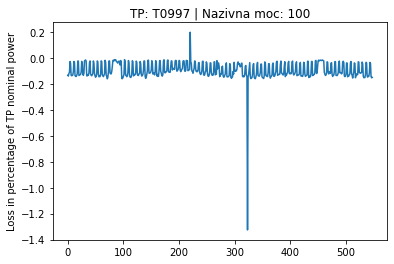

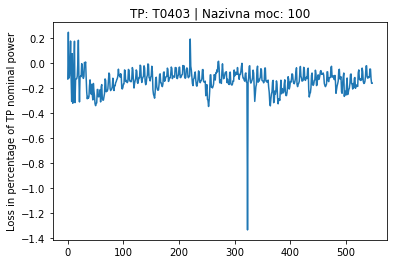

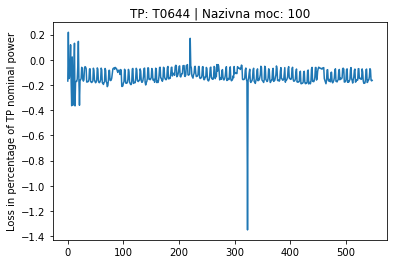

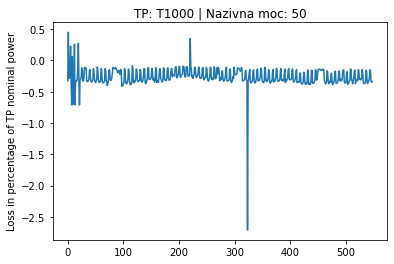

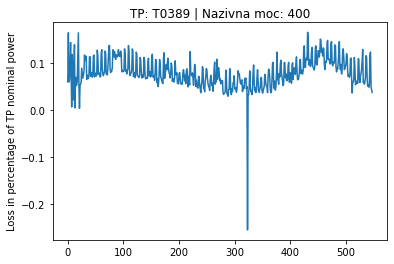

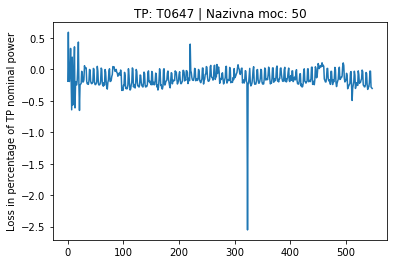

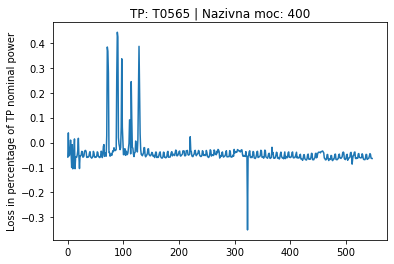

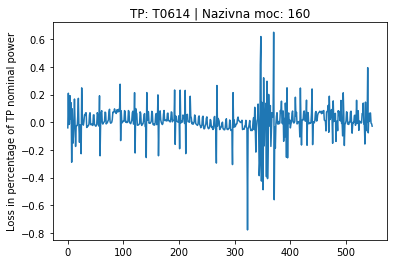

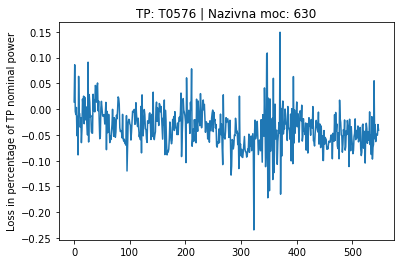

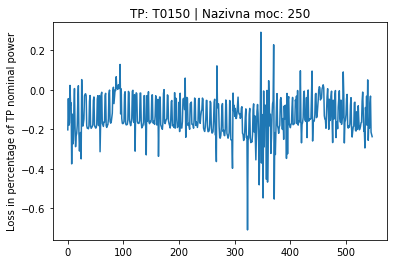

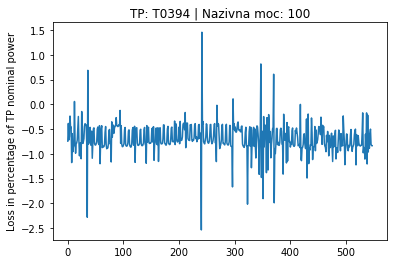

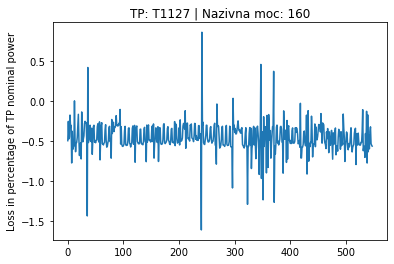

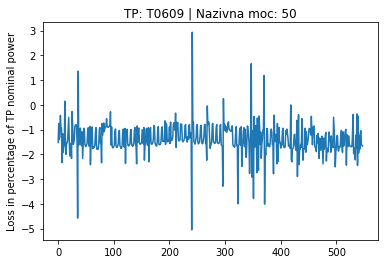

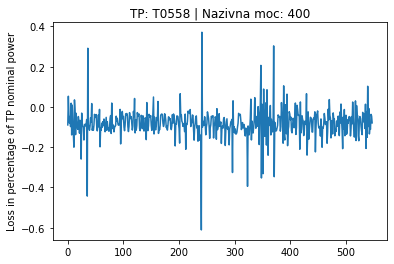

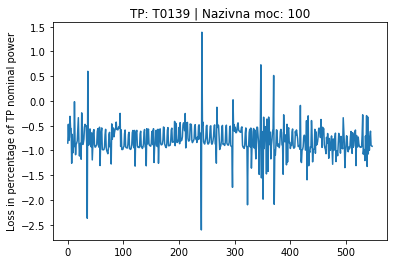

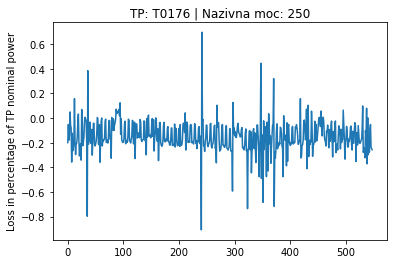

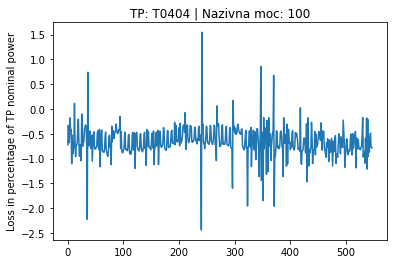

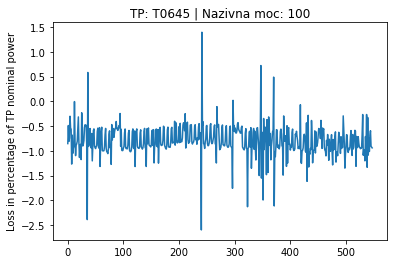

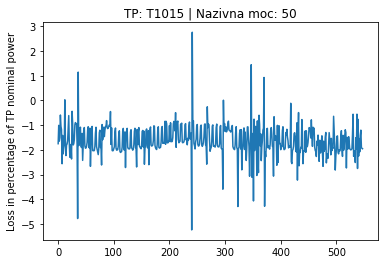

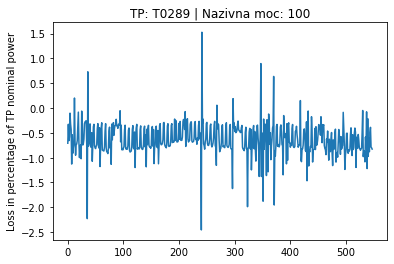

In [41]:
import matplotlib.pyplot as plt
for c in finaldf.columns:
    plt.figure()
    plt.title(f'TP: {c} | Nazivna moc: {mocnaziv[c]}')
#     plt.xlabel('Timestamp')
    plt.ylabel('Loss in percentage of TP nominal power')
    plt.plot(finaldf[c])